In [2]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as mc

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, ColumnDataSource, Range1d

%matplotlib inline
output_notebook()

tweets = pd.read_csv('../tweets/tweets_clean.csv',
                     header=0,
                     parse_dates=['date'])
tweets.dropna(subset=['lemmas'], inplace=True)
tweets.reset_index(drop=True, inplace=True)

Loading BokehJS ...

In [3]:
topics = pd.read_csv('../results_csv/topics_per_doc_LDA.csv', header=0, index_col=0)
topics.reset_index(drop=True, inplace=True)
topics.rename(columns={'dominant_topic': 'topic'}, inplace=True)

sentiments = pd.read_csv('../results_csv/tweet_sentiments.csv', header=0)

In [14]:
data = pd.concat([tweets, topics['topic'], sentiments['polarity']], axis=1)
data.set_index(tweets['date'], inplace=True)

user_tweets = data[data['user_key'] == 'ameliebaldwin']

In [15]:
user_subset = user_tweets.loc['2016-07-01':]
daily_user = user_subset.groupby(user_subset.index.date).size().to_frame('counts')


def daily_counts(tweets_df):
    # Create color palette for tweet values
    palette = sns.color_palette('YlOrRd', len(tweets_df))
    # Assign a color to each value of tweets by rank
    tweets_df['color'] = [mc.rgb2hex(palette[int(rank - 1)]) for rank in tweets_df.counts.rank()]

    src = ColumnDataSource(data=dict(date=tweets_df.index.values,
                                     counts=tweets_df.counts,
                                     color=tweets_df.color))

    p = figure(width=950, height=600,
               x_axis_type='datetime',
               x_axis_label='Date',
               y_axis_label='Number of tweets',
               title='Tweets per day')

    p.line(x='date',
           y='counts',
           line_width=4,
           color='lightgray',
           source=src)
    p.circle(x='date',
             y='counts',
             fill_color='color',
             size=12,
             source=src)

    hover = HoverTool(tooltips=[('Date', '@date{%m-%d-%Y}'),
                                ('Num tweets', '@counts')],
                      formatters={'date': 'datetime'},
                      mode='mouse')
    p.add_tools(hover)
    p.xgrid.grid_line_color = None

    return p


In [16]:
daily_plot = daily_counts(daily_user)
show(daily_plot)

Index(['counts'], dtype='object')


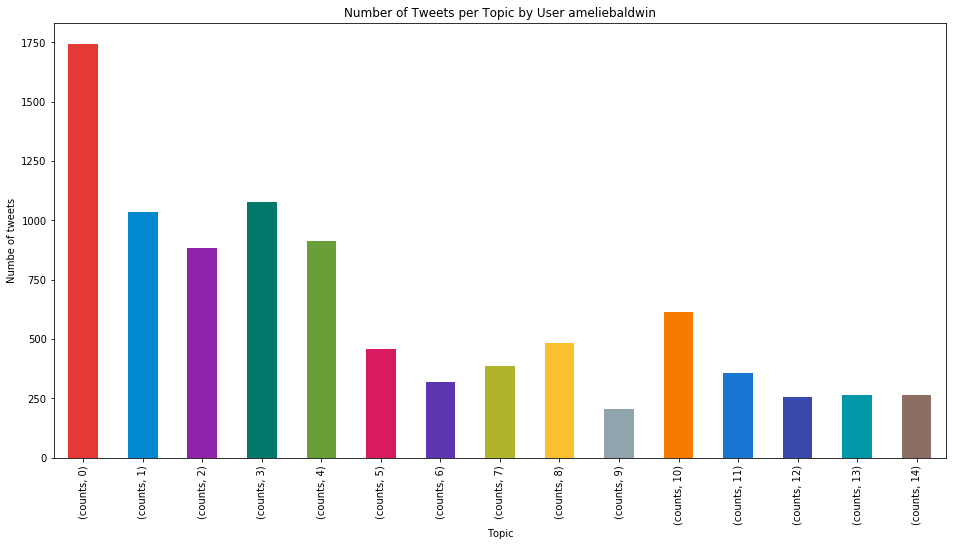

In [28]:
user_topics = user_tweets.groupby(user_tweets.topic).size().to_frame('counts')
fig = user_topics.unstack().plot(kind='bar',
                                 figsize=(16, 8),
                                 color=['#E53935', '#0288D1', '#8E24AA', '#00796B', '#689F38',
                                        '#D81B60', '#5E35B1', '#AFB42B', '#FBC02D', '#90A4AE',
                                        '#F57C00', '#1976D2', '#3949AB', '#0097A7', '#8D6E63'],
                                 title='Number of Tweets per Topic by User ameliebaldwin')
fig.set_xlabel('Topic')
fig.set_ylabel('Numbe of tweets')

print(user_topics.columns)
plt.show()